# 1 .데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('./datas/train_df.csv', index_col=0)
test = pd.read_csv('./datas/test_df.csv', index_col=0)
test_original = pd.read_csv('./datas/test.csv')

In [30]:
df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0,3,1,1,1,3,2,0,1
1,1,1,2,2,2,4,2,0,1
2,1,3,2,1,3,3,1,1,1
3,1,1,2,1,2,4,2,0,1
4,0,3,1,1,1,4,1,1,1


In [89]:
test.head()

,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,3,1,3,1,4,1,1,1
1,3,2,1,2,5,2,0,1
2,2,1,3,1,7,1,1,1
3,3,1,1,1,3,1,1,1
4,3,2,1,2,3,3,0,1


In [6]:
# 학습 세부 정보 X
X = df.iloc[:,1:]

# 학습 생존 여부 y
y = df.iloc[:,0]


# 2. 학습 및 테스트 셋 준비

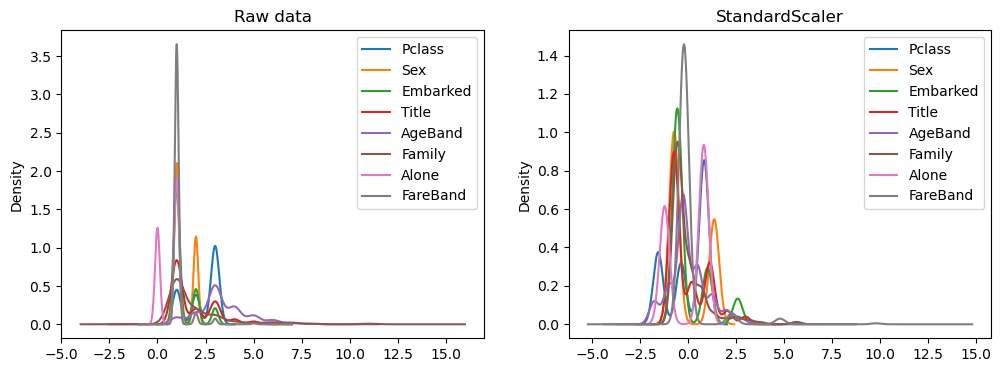

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

fig, ax = plt.subplots(1, 2, figsize=(12,4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
# train_test_split으로 나눴을 때
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(668, 8) (668,)
(223, 8) (223,)


In [9]:
# 실제 test.csv 파일로 shape 확인
print(X.shape)
print(test.shape)

(891, 8)
(418, 8)


## 3-1. 로지스틱 회귀

In [32]:
from sklearn.linear_model import LogisticRegression # 임포트
classifier = LogisticRegression() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.54 %
Standard Deviation: 2.47 %


In [11]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(classifier.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.065021
3,Title,0.476638
2,Embarked,0.146942
7,FareBand,0.109188
4,AgeBand,-0.239855
5,Family,-0.435765
6,Alone,-0.770335
0,Pclass,-0.903679


- 로지스틱 회귀(분류)에서 생존율에 영향을 끼치는 가장 큰 요인은 성별임

## 3-2. 결정 트리 분류

In [12]:
from sklearn.tree import DecisionTreeClassifier # 임포트
classifier = DecisionTreeClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 79.94 %
Standard Deviation: 3.40 %


## 3-3. 랜덤 포레스트

In [13]:
from sklearn.ensemble import RandomForestClassifier # 임포트
classifier = RandomForestClassifier(n_estimators=50) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.09 %
Standard Deviation: 6.25 %


## 3-4. 가우시안 나이브 베이즈 분류

In [14]:
from sklearn.naive_bayes import GaussianNB # 임포트
classifier = GaussianNB() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.83 %
Standard Deviation: 5.57 %


## 3-5. k-최근접 이웃

In [15]:
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

In [16]:
from sklearn.neighbors import KNeighborsClassifier # 임포트
classifier = KNeighborsClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 78.46 %
Standard Deviation: 4.45 %


## 3-6. 에이다 부스트

In [17]:
from sklearn.ensemble import AdaBoostClassifier # 임포트
classifier = AdaBoostClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 81.88 %
Standard Deviation: 4.77 %


## 3-7. 이차 판별 분석 분류

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 임포트
classifier = QuadraticDiscriminantAnalysis() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 81.75 %
Standard Deviation: 4.86 %


## 3-8. 서포트 벡터 머신

In [19]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='linear') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.52 %
Standard Deviation: 4.45 %


## 3-9. 서포트 벡터 머신(RBF 커널)

In [20]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='rbf') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.65 %
Standard Deviation: 4.64 %


## 3-10. 보팅 분류기

In [21]:
from sklearn.ensemble import VotingClassifier # 임포트
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 83.37 %
Standard Deviation: 4.30 %


## 3-11. 배깅 분류기

In [22]:
from sklearn.ensemble import BaggingClassifier # 임포트
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 83.10 %
Standard Deviation: 4.55 %


## ※. 알고리즘 성능 비교

Mean accuracy of LR : 80.54 %
Mean accuracy of D_tree : 79.34 %
Mean accuracy of RF : 79.65 %
Mean accuracy of GNB : 80.40 %
Mean accuracy of KNN : 81.15 %
Mean accuracy of Ada : 80.40 %
Mean accuracy of QDA : 82.78 %
Mean accuracy of SVM_l : 82.80 %
Mean accuracy of SVM_k : 80.83 %
Mean accuracy of Voting : 82.77 %
Mean accuracy of Bagging : 80.09 %


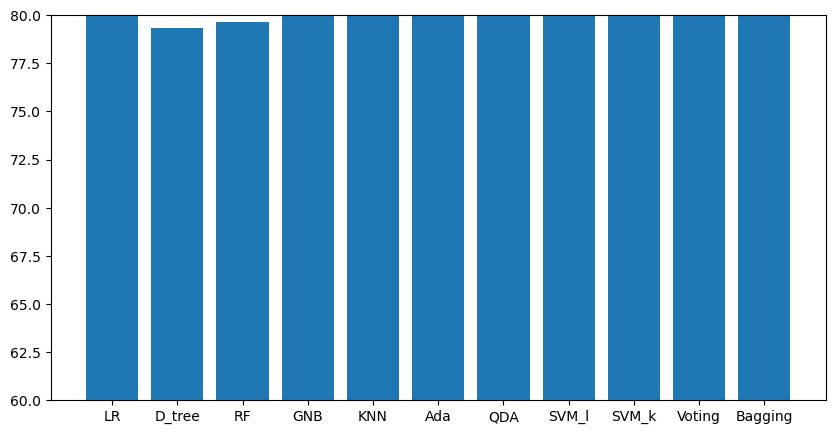

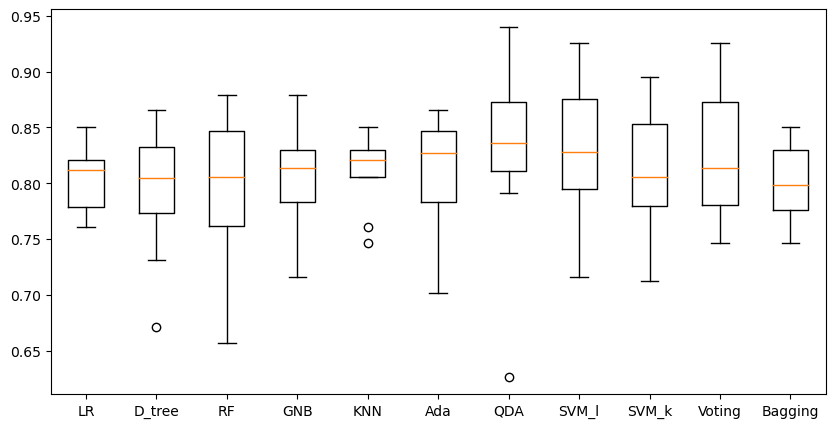

In [26]:
# 분류기 지정
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'), AdaBoostClassifier(), QuadraticDiscriminantAnalysis(), VotingClassifier(estimators=[('1', AdaBoostClassifier()), ('2', RandomForestClassifier()), ('3', SVC(kernel='linear'))]), BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)]

# 분류기 이름 지정
classifier_names = ['LR','D_tree', 'RF', 'GNB', 'KNN', 'Ada', 'QDA', 'SVM_l', 'SVM_k', 'Voting', 'Bagging']

# 리스트 생성
modelaccuracies, modelmeans, modelnames = [], [], []

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    skf = StratifiedKFold(n_splits=10, shuffle=True) # 계층별 교차 검증 설정
    accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100)) # 평균값 출력

    # 결과 저장
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 평균값 그래프 출력
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans)

# 박스 그래프 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

## 4. 테스트 세트 생존 확률 예측(LR)

In [33]:
import numpy as np
# proba = classifier.predict_proba(X_test[:5])
proba = classifier.predict_proba(test) #test_df.csv 파일로 확인
print(np.round(proba, decimals=2))

[[0.9  0.1 ]
 [0.46 0.54]
 [0.88 0.12]
 [0.9  0.1 ]
 [0.45 0.55]
 [0.88 0.12]
 [0.3  0.7 ]
 [0.81 0.19]
 [0.33 0.67]
 [0.91 0.09]
 [0.9  0.1 ]
 [0.71 0.29]
 [0.08 0.92]
 [0.88 0.12]
 [0.12 0.88]
 [0.15 0.85]
 [0.78 0.22]
 [0.89 0.11]
 [0.24 0.76]
 [0.5  0.5 ]
 [0.66 0.34]
 [0.5  0.5 ]
 [0.13 0.87]
 [0.48 0.52]
 [0.31 0.69]
 [0.93 0.07]
 [0.04 0.96]
 [0.89 0.11]
 [0.71 0.29]
 [0.9  0.1 ]
 [0.85 0.15]
 [0.81 0.19]
 [0.61 0.39]
 [0.61 0.39]
 [0.54 0.46]
 [0.86 0.14]
 [0.31 0.69]
 [0.31 0.69]
 [0.9  0.1 ]
 [0.9  0.1 ]
 [0.9  0.1 ]
 [0.6  0.4 ]
 [0.94 0.06]
 [0.27 0.73]
 [0.12 0.88]
 [0.9  0.1 ]
 [0.68 0.32]
 [0.87 0.13]
 [0.21 0.79]
 [0.51 0.49]
 [0.52 0.48]
 [0.76 0.24]
 [0.24 0.76]
 [0.2  0.8 ]
 [0.76 0.24]
 [0.84 0.16]
 [0.92 0.08]
 [0.9  0.1 ]
 [0.87 0.13]
 [0.06 0.94]
 [0.88 0.12]
 [0.83 0.17]
 [0.88 0.12]
 [0.25 0.75]
 [0.34 0.66]
 [0.27 0.73]
 [0.21 0.79]
 [0.71 0.29]
 [0.63 0.37]
 [0.51 0.49]
 [0.25 0.75]
 [0.9  0.1 ]
 [0.37 0.63]
 [0.57 0.43]
 [0.06 0.94]
 [0.57 0.43]
 [0.9  0.1 ]

### 테스트 데이터 결과 확인

In [34]:
print(proba.mean(axis=0))

[0.59954958 0.40045042]


- 418명 중 사망자 약 60%, 생존자 40%

### K-평균 알고리즘으로 클러스터 찾기

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(proba)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1]), array([258, 160], dtype=int64))


- 사망자 258명, 생존자 160명으로 테스트 데이터 퍼센트와 거의 일치함

### ※. 생존 여부 추가하여 CSV로 저장

In [37]:
test_copy = test_original.copy()

In [38]:
print(test_copy)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [39]:
print(np.round(proba[:,1])) # proba의 두번째 내용이 실제 생존여부(0: 사망, 1: 생존)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [40]:
test_copy.insert(1, 'Survived', np.round(proba[:,1])) # Survived 컬럼 추가

In [41]:
print(test_copy)

     PassengerId  Survived  Pclass  \
0            892       0.0       3   
1            893       1.0       3   
2            894       0.0       2   
3            895       0.0       3   
4            896       1.0       3   
..           ...       ...     ...   
413         1305       0.0       3   
414         1306       1.0       1   
415         1307       0.0       3   
416         1308       0.0       3   
417         1309       0.0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [42]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [43]:
test_copy = test_copy.astype({'Survived':'int64'}) # 데이터형 통일

In [44]:
test_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# csv 파일로 저장
test_copy.to_csv('./datas/test_survived.csv', index=None)